# Matrix Analysis 2022 - EE312
## Linear regression - Gaussian and polynomial kernels

Let us study a small example of linear regression using either polynomials or gaussian kernels.

The problem we intend to solve is $y=f(x,\beta) = \sum_{j=1}^n \beta_j\varphi_j(x)$.

This can be rewritten as a linear system $y=Ab$ using,

$y=\begin{pmatrix}y_1\\y_2\\ \vdots\\y_m\end{pmatrix}\in\mathbb{R}^m$, 
$A=\begin{pmatrix}
\varphi_1(x_1) & ... & \varphi_n(x_1)\\
\vdots & & \vdots\\
\varphi_1(x_m) & ... & \varphi_n(x_m)
\end{pmatrix}\in\mathbb{R}^{m\times n}$, 
$b=\begin{pmatrix}\beta_1\\ \beta_2 \\ \vdots \\ \beta_n\end{pmatrix}\in\mathbb{R}^n$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Let us generate a test signal for $y$ (with a bit of noise).

In [187]:
N = 100
x = np.arange(0, N)
y = np.sin(0.1*x) + (x/50)**2 
yn = y + 0.3*np.random.randn(N)

we will only use half of the samples of the complete signal

In [188]:
xs = x[np.arange(0, N, 2)]
yns = yn[np.arange(0, N, 2)]

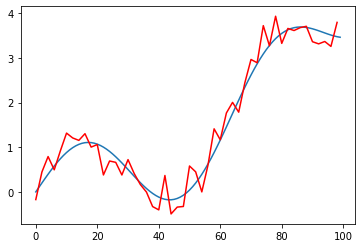

In [189]:
plt.plot(y)
plt.plot(xs, yns, 'r')

Let us define a translated gaussian kernel function for $\varphi$

In [185]:
def phi(n, x):
    return np.exp(-0.05*(x-n)**2)

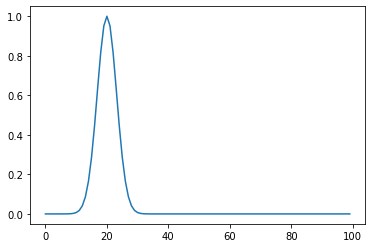

In [186]:
plt.plot(phi(20, x))

In [228]:
A = np.zeros((N//2, N//4))

In [231]:
for k in range(N//4):
    A[:, k] = phi(4*k, xs)

In [232]:
beta = np.linalg.inv(A.T@A)@(A.T@yns)

In [233]:
beta

array([-0.37278583,  0.71832798,  0.13140576,  0.94443894,  0.52738533,
        0.49294002,  0.21206568,  0.18015236,  0.64699151, -0.55011973,
        0.20989392, -0.21426334, -0.35272698,  0.74781209, -0.50112937,
        1.48043507,  0.48422405,  1.28464507,  1.70079861,  1.74008845,
        2.12801101,  1.13637142,  3.06122767, -0.05541057,  3.74167753])

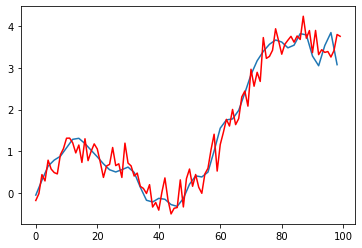

In [234]:
plt.plot(xs, A@beta)
plt.plot(yn, 'r')

Another common choice for $\varphi$ is to use polynomials.

In [235]:
Ap = np.zeros((N//2, N//8))
for k in range(N//8):
    Ap[:, k] = np.power(xs,k)

In [236]:
bp = np.linalg.inv(Ap.T@Ap)@(Ap.T@yns)

In [237]:
bp

array([-1.43433138e-01,  3.00172114e-01, -3.10816747e-02,  1.99162968e-03,
       -8.49471062e-05,  2.18343271e-06, -3.29633643e-08,  2.89888178e-10,
       -1.39605008e-12,  2.88888337e-15,  9.50867487e-21,  1.98986834e-20])

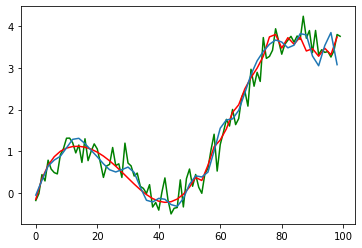

In [238]:
plt.plot(yn, 'g')
plt.plot(xs, Ap@bp, 'r')
plt.plot(xs, A@beta)
